<a href="https://colab.research.google.com/github/chaeyh4/MotionSense/blob/main/axis_angle_to_rotation_matirx_3d_vectorized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
axes = np.random.uniform(low=-1, high=1, size=(100, 3)) 
angles = np.random.uniform(low=-np.pi, high=np.pi, size=(100))

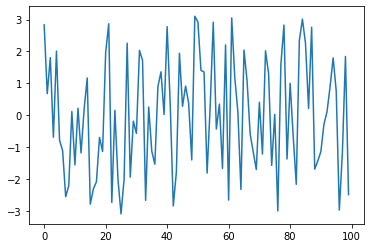

In [ ]:
plt.plot(angles)

In [ ]:
def axis_angle_to_rotation_matrix_3d_vectorized(axes, angles):
    """
    Get the rotational matrix corresponding to a rotation of (angle) radian around the axes

    Reference: the Transforms3d package - transforms3d.axangles.axangle2mat
    Formula: http://en.wikipedia.org/wiki/Rotation_matrix#Axis_and_angle
    """
    axes = axes / np.linalg.norm(axes, ord=2, axis=1, keepdims=True)

    x = axes[:, 0]; y = axes[:, 1]; z = axes[:, 2]
    c = np.cos(angles)
    s = np.sin(angles) 
    C = 1 - c

    xs = x*s;   ys = y*s;   zs = z*s
    xC = x*C;   yC = y*C;   zC = z*C
    xyC = x*yC; yzC = y*zC; zxC = z*xC

    m = np.array([
        [ x*xC+c,   xyC-zs,   zxC+ys ],
        [ xyC+zs,   y*yC+c,   yzC-xs ],
        [ zxC-ys,   yzC+xs,   z*zC+c ]])

    matrix_transposed = np.transpose(m, axes=(2,0,1))
    
    return matrix_transposed

axis_angle_to_rotation_matrix_3d_vectorized에 사용된 수식

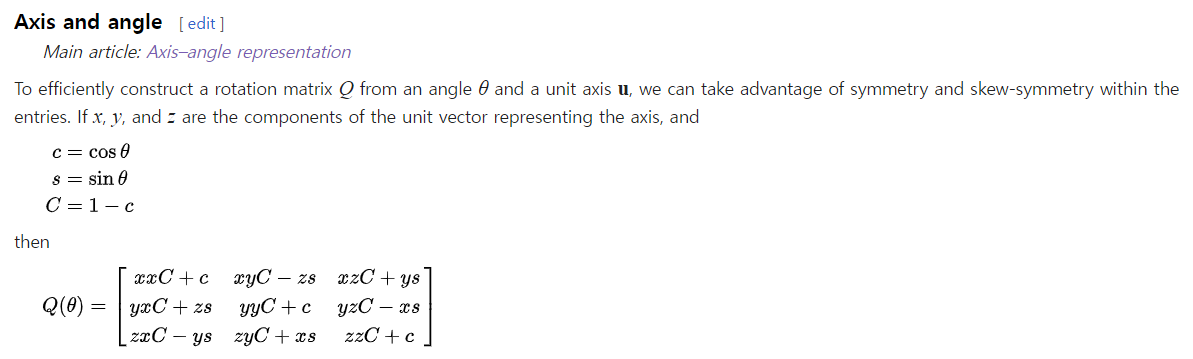

https://en.wikipedia.org/wiki/Rotation_matrix#Axis_and_angle

axes 정규화 값 확인

In [ ]:
axes_norm = axes / np.linalg.norm(axes, ord=2, axis=1, keepdims=True)

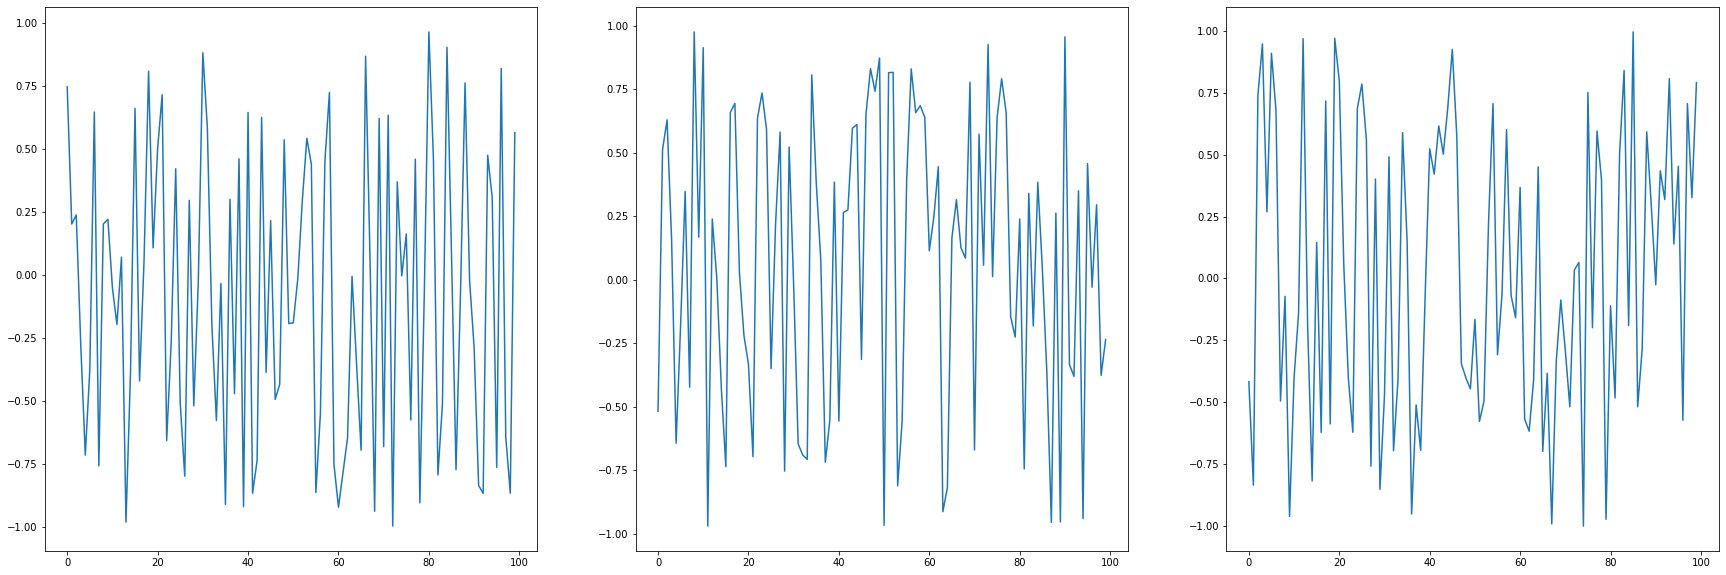

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.plot(axes_norm[:,0])
plt.subplot(1,3,2)
plt.plot(axes_norm[:,1])
plt.subplot(1,3,3)
plt.plot(axes_norm[:,2])
plt.show()

axes 정규화 전의 값 확인

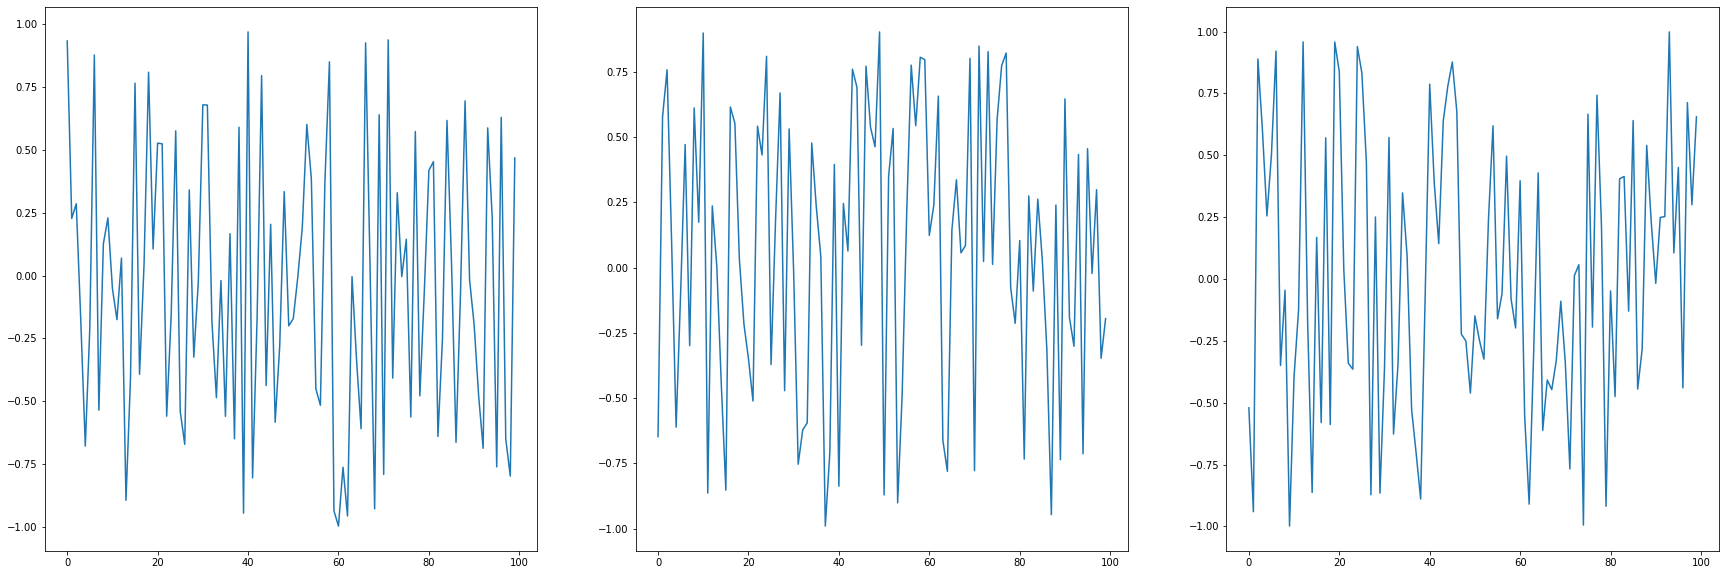

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.plot(axes[:,0])
plt.subplot(1,3,2)
plt.plot(axes[:,1])
plt.subplot(1,3,3)
plt.plot(axes[:,2])
plt.show()

axes의 값이 모두 -1 ~ 1로 조정됨

그래프의 모양은 정규화 전과 비슷하게 유지됨

함수 안의 요소

In [ ]:
x = axes[:, 0]; y = axes[:, 1]; z = axes[:, 2]
c = np.cos(angles)
s = np.sin(angles) 
C = 1 - c

xs = x*s;   ys = y*s;   zs = z*s
xC = x*C;   yC = y*C;   zC = z*C
xyC = x*yC; yzC = y*zC; zxC = z*xC

m = np.array([
    [ x*xC+c,   xyC-zs,   zxC+ys ],
    [ xyC+zs,   y*yC+c,   yzC-xs ],
    [ zxC-ys,   yzC+xs,   z*zC+c ]])

matrix_transposed = np.transpose(m, axes=(2,0,1))

In [ ]:
m.shape

(3, 3, 100)

In [ ]:
result_matrix = axis_angle_to_rotation_matrix_3d_vectorized(axes, angles)

In [ ]:
result_matrix.shape

(100, 3, 3)

In [ ]:
result_matrix

array([[[ 1.37463801e-01, -6.28377279e-01, -7.65666832e-01],
        [-8.82758101e-01, -4.28335526e-01,  1.93046143e-01],
        [-4.49268115e-01,  6.49361742e-01, -6.13585763e-01]],

       [[ 7.87924792e-01,  5.46158338e-01,  2.84403925e-01],
        [-5.00440976e-01,  8.37076603e-01, -2.21046577e-01],
        [-3.58794303e-01,  3.18407005e-02,  9.32873420e-01]],

       [[-1.63919483e-01, -5.34080892e-01,  8.29390139e-01],
        [ 9.03478174e-01,  2.56271830e-01,  3.43586872e-01],
        [-3.96052512e-01,  8.05656471e-01,  4.40522483e-01]],

       [[ 7.89277253e-01,  5.92279708e-01, -1.62006681e-01],
        [-6.12640128e-01,  7.77365043e-01, -1.42743348e-01],
        [ 4.13943421e-02,  2.11915871e-01,  9.76410862e-01]],

       [[ 3.05233662e-01,  4.13887058e-01, -8.57630407e-01],
        [ 9.00820467e-01,  1.66546815e-01,  4.00979605e-01],
        [ 3.08795882e-01, -8.94963497e-01, -3.22002239e-01]],

       [[ 7.51645670e-01,  6.59101062e-01,  2.47906673e-02],
        [-6.20